# Sentiment Analysis

_Artificial Intelligence Nanodegree Program | Natural Language Processing_

---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called _sentiment analysis_. In this notebook you will build an end-to-end sentiment classification system from scratch.

## Instructions

Some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this notebook. You will not need to modify the included code beyond what is requested. Sections that begin with '**TODO**' in the header indicate that you need to complete or implement some portion within them. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `# TODO: ...` comment. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions for you to answer which relate to the task and your implementation. Each section where you will answer a question is preceded by a '**Question:**' header. Carefully read each question and provide your answer below the '**Answer:**' header by editing the Markdown cell.

> **Note**: Code and Markdown cells can be executed using the **Shift+Enter** keyboard shortcut. In addition, a cell can be edited by typically clicking it (double-click for Markdown cells) or by pressing **Enter** while it is highlighted.

## Step 1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.

We have provided the dataset for you. You can load it in by executing the Python cell below.

In [4]:
import os
import glob

def read_imdb_data(data_dir='data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [5]:
print(data['train']['pos'][2])

Some have compared this film to Deliverance. I believe Of Mice and Men is more appropriate. Our leading man, Heaton, definitely loves Spike. It is irrelevant and immaterial whether that is a sexual love. It is the reason Heaton does not leave Spike. He needs him. They need each other. As brothers, as family, as their only connection to humanity. The setting, scenario, minimal cast all add up to a fine film. Frankly, I did not care what happened to the characters. But, I did care about what the film maker did with them. He did well with them. I spent some time wondering how the ending would resemble Of Mice and Men. The soundtrack and cinematography were compelling and intriguing.


And one with a negative sentiment:

In [6]:
print(data['train']['neg'][2])

Sadly,this is not 'the best British gore film since hellraiser', though the DVD cover claims this, which is what tricked me into buying it. It is, however, an homage to many of the great horrors of old, films from most notably the Amicus stable.<br /><br />Cradle... is shot on mini dv, which though we all know has more of a TV feel than a movie, can be done so much better. Every scene, set and shot looks like it has been lit in exactly the same way (standard key, fill, rear setup), which only enhances the cheap look of the finished piece. The gore content is, quite frankly, laughable. From the opening shots where we see a man's obviously foam rubber head torn apart, through to tacky cheap prop hammers, the creature effects and the terrible cg, there was nothing in there that impressed me at all.<br /><br />The acting is abominable, from the near-comatose detective to the brummie dwarf, via Dani Filth, the least convincing horror movie bad guy I have ever witnessed. Each of the substori

We can also make a wordcloud visualization of the reviews.

In [7]:
# Installing wordcloud
!pip install wordcloud

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


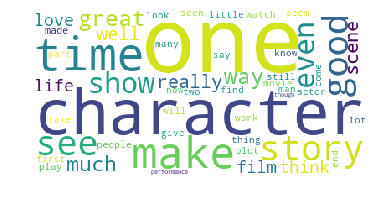

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'pos'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

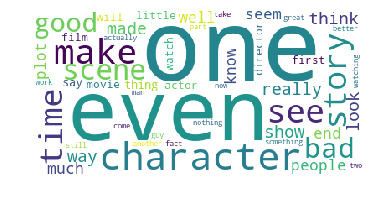

In [7]:
sentiment = 'neg'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

Try changing the sentiment to `'neg'` and see if you can spot any obvious differences between the wordclouds.

### TODO: Form training and test sets

Now that you've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [8]:
from sklearn.utils import shuffle

def prepare_imdb_data(data):
    """Prepare training and test sets from IMDb movie reviews."""
    
    # TODO: Combine positive and negative reviews and labels
    data_train = [x for x in data['train']['pos']]
    labels_train = ['pos' for x in data['train']['pos']]
    
    data_train.extend([x for x in data['train']['neg']])
    labels_train.extend(['neg' for x in data['train']['neg']])
    
    data_test = [x for x in data['test']['pos']]
    labels_test = ['pos' for x in data['test']['pos']]
    
    data_test.extend([x for x in data['test']['neg']])
    labels_test.extend(['neg' for x in data['test']['neg']])
    
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    data_test, labels_test = shuffle(data_test, labels_test)
    
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

IMDb reviews (combined): train = 25000, test = 25000


In [9]:
labels_train[0:10]

['neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos']

## Step 2. Preprocessing

As you might have noticed in the sample reviews, our raw data includes HTML. Therefore there are HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.

### TODO: Convert each review to words

As your next task, you should complete the function `review_to_words()` that performs all these steps. For your convenience, in the Python cell below we provide you with all the libraries that you may need in order to accomplish these preprocessing steps. Make sure you can import all of them! (If not, pip install from a terminal and run/import again.)

In [10]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
regex = re.compile("[^a-z ]")
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem

    # Return final list of words
    # text = BeautifulSoup(review, "html5lib").get_text()
    # text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    soup = BeautifulSoup(review, "lxml") 
    review = soup.get_text()
    # print(review)
    review = review.lower()
    
    # review = review.replace(".", " ")
    review = regex.sub(" ", review)
    
    review = review.lower()
    
    
    stop_words = stopwords.words('english')
    # print(stop_words)
    words = [word for word in review.split() if word not in stop_words]
    
    words = [stemmer.stem(word) for word in words]
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")

['test', 'test', 'would', 'make', 'great', 'movi', 'review']

With the function `review_to_words()` fully implemeneted, we can apply it to all reviews in both training and test datasets. This may take a while, so let's build in a mechanism to write to a cache file and retrieve from it later.

In [12]:
review_to_words("123 thou's are you doing bro, great movie1 ?")

['thou', 'bro', 'great', 'movi']

In [13]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
This film is available from David Shepard and Kino on the Before Hollywood There Was Fort Lee, NJ, although that is a shortened version with just the "behind-the-scenes movie sections. I'm not sure if Blackhawk Films only had a film print of these parts, or they edited out the other scenes. The original Blackhawk version was retitled A Movie Romance. The complete feature does survive, but the preprint for this version had some nitrate decomposition, and a couple of sections looked bad, so that may be why Blackhawk's version was edited.<br /><br />Directed by Maurice Tourneur, the film has Tourneur playing himself, or more likely a caricature of himself. Supposedly, director Emile Chautard and future director Joseph von Sternberg also can be spotted.<br /><br />Country lass Mary (Doris Kenyon) longs for a romantic man to sweep her off her feet. She dreams of a troubadour that will woo her, but is constantl

## Step 3: Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we are not allowed to peek at the testing data at all!

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What do you do if you encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### TODO: Compute Bag-of-Words features

Implement the `extract_BoW_features()` function, apply it to both training and test datasets, and store the results in `features_train` and `features_test` NumPy arrays, respectively. Choose a reasonable vocabulary size, say $|V| = 5000$, and keep only the top $|V|$ occuring words and discard the rest. This number will also serve as the number of columns in the BoW matrices.

> **Hint**: You may find it useful to take advantage of `CountVectorizer` from scikit-learn. Also make sure to pickle your Bag-of-Words transformation so that you can use it in future.

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays

def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # TODO: Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
#         vectorizer = CountVectorizer(max_features=vocabulary_size, preprocessor=lambda x: x) # analyzer='word'

#         features_train = vectorizer.fit_transform([w for sent in words_train for w in sent]).toarray()
        vectorizer = CountVectorizer(max_features=vocabulary_size,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
        features_train = vectorizer.fit_transform(words_train).toarray()
        print(type(features_train))
        # TODO: Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test = vectorizer.transform(words_test).toarray()
        
        # NOTE: Remember to convert the features using .toarray() for a compact representation
        
        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[3])
print("\n--- Bag-of-Words features ---")
print(features_train[3])
print("\n--- Label ---")
print(labels_train[3])

Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['imperson', 'struck', 'fist', 'cute', 'caught', 'rap', 'redempt', 'weaker']

--- Preprocessed words ---
['movi', 'plain', 'bad', 'even', 'worth', 'watch', 'make', 'fun', 'lunat', 'professor', 'plain', 'annoy', 'even', 'suspend', 'disbelief', 'allow', 'invis', 'gladi', 'sake', 'good', 'bad', 'movi', 'allow', 'exceedingli', 'stupid', 'victim', 'horror', 'movi', 'movi', 'ask', 'even', 'look', 'women', 'locker', 'room', 'shower', 'scene', 'random', 'sexual', 'encount', 'get', 'porn', 'look', 'good', 'bad', 'movi', 'get', 'someth', 'els', 'want', 'simpli', 'wast', 'time', 'annoy', 'bad', 'movi', 'rent']

--- Bag-of-Words features ---
[0 0 0 ... 0 0 0]

--- Label ---
neg


Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

In [16]:
list(features_train[3]).count(1)

28

In [17]:
list(features_train[3]).count(2)

6

In [18]:
list(features_train[3]).count(3)

1

In [19]:
len(features_train[1]) # Vocabulary size

5000

In [22]:
import matplotlib.pyplot as plt
# Plot the BoW feature vector for a training document
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

<Figure size 640x480 with 1 Axes>

In [23]:
total_zeros_in_each_f = []
for f in features_train:
    total_zeros_in_each_f.append(list(f).count(0))

In [24]:
round(np.average(total_zeros_in_each_f)/len(vocabulary)*100, 2)

98.31

#### Question: Reflecting on Bag-of-Words feature representation

What is the average sparsity level of BoW vectors in our training set? In other words, on average what percentage of entries in a BoW feature vector are zero?

#### Answer:

> Over 98%

### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

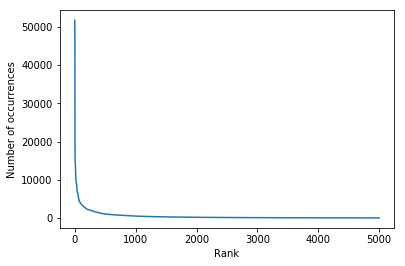

In [25]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
# plt.gca().set_xscale('log')
# plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

In science and engineering, a log–log graph or log–log plot is a two-dimensional graph of numerical data that uses logarithmic scales on both the horizontal and vertical axes. Monomials – relationships of the form {\displaystyle y=ax^{k}} y=ax^k – appear as straight lines in a log–log graph, with the power term corresponding to the slope, and the constant term corresponding to the intercept of the line. Thus these graphs are very useful for recognizing these relationships and estimating parameters. Any base can be used for the logarithm, though most common are 10, e, and 2.

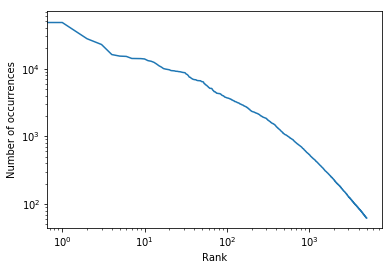

In [26]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

In [27]:
sorted_word_freq

array([51695, 48190, 27741, ...,    62,    62,    62])

#### Question: Zipf's law

What is the total number of occurrences of the most frequent word? What is the the total number of occurrences of the second most frequent word? Do your numbers follow  Zipf's law? If not, why?

#### Answer:

...

### TODO: Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, let's normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [30]:
import sklearn.preprocessing as pr

# TODO: Normalize BoW features in training and test set
features_train = pr.normalize(features_train)

In [31]:
list(features_train[2][22:35])

[0.0,
 0.0,
 0.06398566881509836,
 0.0,
 0.0,
 0.06398566881509836,
 0.0,
 0.0,
 0.0,
 0.06398566881509836,
 0.0,
 0.03199283440754918,
 0.0]

## Step 4: Classification using BoW features

Now that the data has all been properly transformed, we can feed it into a classifier. To get a baseline model, we train a Naive Bayes classifier from scikit-learn (specifically, [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), and evaluate its accuracy on the test set.

In GaussianNB, p(data|class)* p(class) is also calculated but rather than p(data|class) being a fixed number, it is a distribution itself

Bernoulli Naive Bayes : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

Multinomial Naive Bayes : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

Gaussian Naive Bayes : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

In [32]:
from sklearn.naive_bayes import GaussianNB

# TODO: Train a Guassian Naive Bayes classifier
clf1 = GaussianNB().fit(features_train, labels_train)

# Calculate the mean accuracy score on training and test sets
print("[{}] Accuracy: train = {}, test = {}".format(
        clf1.__class__.__name__,
        clf1.score(features_train, labels_train),
        clf1.score(features_test, labels_test)))

[GaussianNB] Accuracy: train = 0.8198, test = 0.74948


Tree-based algorithms often work quite well on Bag-of-Words as their highly discontinuous and sparse nature is nicely matched by the structure of trees. As your next task, you will try to improve on the Naive Bayes classifier's performance by using scikit-learn's Gradient-Boosted Decision Tree classifer.

### TODO: Gradient-Boosted Decision Tree classifier

Use [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from scikit-learn to classify the BoW data. This model has a number of parameters. We use default parameters for some of them and pre-set the rest for you, except one: `n_estimators`. Find a proper value for this hyperparameter, use it to classify the data, and report how much improvement you get over Naive Bayes in terms of accuracy.

> **Tip**: Use a model selection technique such as cross-validation, grid-search, or an information criterion method, to find an optimal value for the hyperparameter.

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
n_estimators = 30

def classify_gboost(X_train, X_test, y_train, y_test):        
    # Initialize classifier
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=0)

    # TODO: Classify the data using GradientBoostingClassifier
    clf.fit(features_train, labels_train)
    # TODO(optional): Perform hyperparameter tuning / model selection
#     param_grid = [
#       {'n_estimators': [10, 32, 64, 128]} #, 'learning_rate':[0.01, 0.1, 1.0]},
#      ]
#     grid = GridSearchCV(clf, param_grid)
#     grid.fit(X_train, y_train)
#     # TODO: Print final training & test accuracy
#     clf = grid.best_estimator_
#     print("Best parameters are", grid.best_params_)
    
    print("[{}] Accuracy: train = {}, test = {}".format(
        clf.__class__.__name__,
        clf.score(X_train, y_train),
        clf.score(X_test, y_test)))
    # Return best classifier model
    return clf


clf2 = classify_gboost(features_train, features_test, labels_train, labels_test)

[GradientBoostingClassifier] Accuracy: train = 0.79432, test = 0.78752


In [115]:
labels_train[0:10]

['pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos']

### TODO: Adverserial testing

Write a short movie review to trick your machine learning model! That is, a movie review with a clear positive or negative sentiment that your model will classify incorrectly.

> **Hint**: You might want to take advantage of the biggest weakness of the Bag-of-Words scheme!

In [34]:
vocabulary

{'movi': 2972,
 'make': 2757,
 'cri': 1115,
 'end': 1531,
 'watch': 4844,
 'least': 2608,
 '3': 73,
 '4': 79,
 'week': 4867,
 'seen': 3926,
 'load': 2680,
 'great': 2019,
 'even': 1597,
 'crap': 1095,
 'one': 3155,
 'scene': 3876,
 'core': 1062,
 'came': 706,
 'seriou': 3955,
 'problem': 3471,
 'stori': 4271,
 'noth': 3098,
 'new': 3051,
 'origin': 3173,
 'real': 3606,
 'sort': 4147,
 'thing': 4484,
 'realli': 3612,
 'happen': 2090,
 'peopl': 3283,
 'exist': 1629,
 'music': 2990,
 'admir': 150,
 'went': 4875,
 'earli': 1451,
 '70': 88,
 'point': 3370,
 'direct': 1318,
 'toward': 4563,
 'never': 3049,
 'work': 4944,
 'good': 1989,
 'us': 4721,
 'believ': 482,
 'tri': 4601,
 'path': 3260,
 'full': 1883,
 'gloriou': 1972,
 'concert': 995,
 'present': 3436,
 'musician': 2991,
 'superhero': 4356,
 'girl': 1957,
 'stupid': 4310,
 'emot': 1517,
 'numb': 3110,
 'glorifi': 1971,
 'drug': 1421,
 'alcohol': 198,
 'promot': 3492,
 'redempt': 3633,
 'come': 952,
 '20': 56,
 'year': 4981,
 'late': 2

In [36]:
# TODO: Write a sample review and set its true sentiment
my_review = "I was expecting the movie to be so great, but it turned out not to be."
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'

# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data
words = review_to_words(my_review)
vectorizer = CountVectorizer(vocabulary=vocabulary,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
bow = vectorizer.transform([words]).toarray()
print(bow)
# TODO: Then call your classifier to label it
clf2.predict(bow)[0]

[[0 0 0 ... 0 0 0]]


'pos'

## Extensions

There are several ways in which you can build upon this notebook. Each comes with its set of challenges, but can be a rewarding experience.

- The first thing is to try and improve the accuracy of your model by experimenting with different architectures, layers and parameters. How good can you get without taking prohibitively long to train? How do you prevent overfitting?

- Then, you may want to deploy your model as a mobile app or web service. What do you need to do in order to package your model for such deployment? How would you accept a new review, convert it into a form suitable for your model, and perform the actual prediction? (Note that the same environment you used during training may not be available.)

- One simplification we made in this notebook is to limit the task to binary classification. The dataset actually includes a more fine-grained review rating that is indicated in each review's filename (which is of the form `<[id]_[rating].txt>` where `[id]` is a unique identifier and `[rating]` is on a scale of 1-10; note that neutral reviews > 4 or < 7 have been excluded). How would you modify the notebook to perform regression on the review ratings? In what situations is regression more useful than classification, and vice-versa?

Whatever direction you take, make sure to share your results and learnings with your peers, through blogs, discussions and participating in online competitions. This is also a great way to become more visible to potential employers!

In [37]:
dict(hi=1, asd=123)

{'hi': 1, 'asd': 123}

### Time for RNNs with Keras

In [90]:
from keras.datasets import imdb  # import the built-in imdb dataset in Keras

# Set the vocabulary size
vocabulary_size = 5000

# Load in training and test data (note the difference in convention compared to scikit-learn)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [91]:
# Inspect a sample review and its label
print("--- Review ---")
print(X_train[3])
print("--- Label ---")
print(y_train[3])

--- Review ---
[1, 75, 451, 7, 1659, 2137, 2353, 8, 30, 35, 2, 762, 11, 4, 86, 273, 21, 14, 20, 11, 843, 47, 2168, 72, 8, 6, 651, 7, 337, 2, 15, 13, 28, 115, 159, 2, 31, 7, 4, 91, 1596, 3487, 7, 701, 2483, 20, 2, 33, 222, 17, 230, 17, 13, 244, 1947, 9, 4, 1742, 7, 2, 4, 3720, 13, 377, 89, 17, 6, 2343, 13, 2, 8, 67, 2, 1060, 7, 4, 351, 6, 2295, 6, 314, 7, 4, 2, 63, 33, 15, 58, 69, 77, 2, 18, 6, 378, 7, 2740, 4716, 141, 2, 4890, 7, 364, 352, 2, 17, 2, 2, 6, 314, 8, 2, 42, 320, 4, 495, 7, 1954, 4748, 190, 1136, 153, 28, 110, 374, 5, 288, 2, 134, 280, 2, 2, 220, 99, 2, 60, 18, 148, 7, 178, 23, 4, 2, 499, 7, 4, 2, 10, 10, 5, 95, 2, 50, 16, 13, 2, 56, 402, 4, 251, 13, 1131, 6, 20, 15, 144, 28, 77, 38, 2, 246, 63, 4332, 83, 4, 2, 60, 159, 2, 2, 4, 86, 1018, 4673, 2, 23, 12, 15, 86, 2, 61, 2, 4, 2, 887, 6, 254, 8, 169, 20, 151, 63, 62, 66, 30, 290, 3266, 46, 5, 14, 8, 30, 252, 9, 12, 13, 92, 262, 657, 8, 763, 99, 76, 7, 6, 1702, 23, 32, 148, 2, 1409, 7, 4, 22, 94, 2, 246, 2, 177, 94, 2299, 246

In [92]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [93]:
id_to_word = {v:k for k,v in imdb.get_word_index().items()}

In [94]:
id_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [95]:
print([id_to_word[n] for n in X_train[3]])

['the', 'bad', 'beginning', 'br', 'castle', 'insane', 'roy', 'in', 'at', 'so', 'and', 'herself', 'this', 'of', 'how', 'put', 'not', 'as', 'on', 'this', 'parents', 'there', 'built', 'we', 'in', 'is', 'happy', 'br', 'completely', 'and', 'for', 'was', 'one', 'best', 'new', 'and', 'by', 'br', 'of', 'its', 'hidden', 'homage', 'br', 'country', 'prime', 'on', 'and', 'they', "there's", 'movie', 'anything', 'movie', 'was', 'rather', 'singer', 'it', 'of', 'x', 'br', 'and', 'of', 'temple', 'was', 'start', "don't", 'movie', 'is', 'captures', 'was', 'and', 'in', 'can', 'and', 'popular', 'br', 'of', 'performances', 'is', 'costume', 'is', 'left', 'br', 'of', 'and', 'really', 'they', 'for', 'my', 'me', 'will', 'and', 'but', 'is', 'stars', 'br', 'pitt', 'viewings', 'should', 'and', 'improvement', 'br', 'along', 'wrong', 'and', 'movie', 'and', 'and', 'is', 'left', 'in', 'and', "it's", 'star', 'of', 'art', 'br', 'discovered', 'capturing', 'take', 'amusing', 'actors', 'one', 'life', 'remember', 'to', 'yea

#### For RNNs we need to preserve the sequence

In [45]:
lengths = []
for review in X_train:
    lengths.append(len(review))

print(max(lengths), min(lengths), np.average(lengths), np.std(lengths))

2494 11 238.71364 176.49367364852034


If we take max sequence of 500 words, the z score is 500-238 divided by 176 which is around 1.5, covering 85% of all reviews being complete, the rest are going to get truncated

In [46]:
sorted(lengths, reverse=True).index(501), len(lengths) # About 2100 reviews out of 25,000 will get truncated

(2092, 25000)

In [47]:
from keras.preprocessing import sequence

# Set the maximum number of words per document (for both training and testing)
max_words = 500

# TODO: Pad sequences in X_train and X_test
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [48]:
X_train[7]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [55]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
# from keras.utils import to_categorical
embedding_size = 128

model = Sequential()
# X_train = to_categorical(X_train)
# model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
# Converts 5000 long vocab size one hot vector into 128 dimensional vector
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))
model.summary()

model.compile(metrics=[f1, "accuracy"], loss="binary_crossentropy", optimizer="adam")
history = model.fit(X_train, y_train, validation_split=0.1, epochs=2, batch_size=64) # Auto-handle validation split

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 660,641
Trainable params: 660,641
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/2
22500/22500 [==============================] - 390s 17ms/step - loss: 0.4655 - f1: 0.7271 - acc: 0.7753 - val_loss: 0.3603 - val_f1: 0.8524 - val_acc: 0.8476
Epoch 2/2
22500/22500 [==============================] - 392s 17ms/step - loss: 0.2704 - f1: 0.8886 - acc: 0.8906 - val_loss: 0.3011 - val_f1: 0.8750 - val_acc: 0.8740


In [51]:
# Save your model, so that you can quickly load it in future (and perhaps resume training)
model_file = "lstm_model.h5"  # HDF5 file
model.save(os.path.join(cache_dir, model_file))

In [62]:
model_json = model.to_json()

with open(os.path.join(cache_dir, "lstm_model.json"), "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights(os.path.join(cache_dir, "lstm_model.h5"))



 Because of custom metric function, directly load_model does not work, need to first save model architecture as JSON file and also save the weights in h5 

In [61]:
from keras.models import load_model, model_from_json
model = model_from_json(open(os.path.join(cache_dir, "lstm_model.json")).read())
model.load_weights(os.path.join(cache_dir, "lstm_model.h5"))

In [64]:
# Evaluate your model on the test set
model.compile(metrics=[f1, "accuracy"], loss="binary_crossentropy", optimizer="adam")
scores = model.evaluate(X_test, y_test)  # returns loss and other metrics specified in model.compile()
print(scores)
print("Test Performance F1 and acc:", scores[1:3])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

25000/25000 [==============================] - 127s 5ms/step
[0.3012729332190752, 0.8748737186431885, 0.8766]
Test Performance F1 and acc: [0.8748737186431885, 0.8766]


In [65]:
model.metrics_names

['loss', 'f1', 'acc']

In [66]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_f1', 'val_acc', 'loss', 'f1', 'acc'])

In [67]:
history.history

{'val_loss': [0.36033833551406863, 0.3011163348197937],
 'val_f1': [0.8523912444591523, 0.8750308513641357],
 'val_acc': [0.8476, 0.874],
 'loss': [0.4655185283554925, 0.27038124961323207],
 'f1': [0.7271259945551555, 0.8886480010032654],
 'acc': [0.7752888888465034, 0.8906222222540113]}

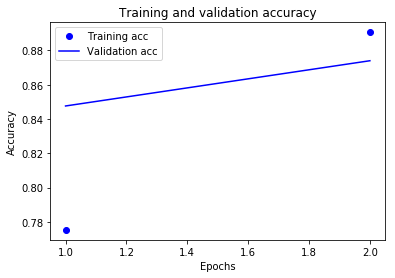

In [68]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

 Tutorial from official website: https://www.tensorflow.org/tutorials/keras/basic_text_classification

### LSTM model is significantly better than Gradient boosted trees or Gaussian NB

In [69]:
# TODO: Write a sample review and set its true sentiment
my_review = "I was expecting the movie to be so great, but it turned out not to be."
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'

vocab = imdb.get_word_index()
# words = review_to_words(my_review)
words = my_review.lower().split()
print(words)
words = [vocab.get(w, 2) for w in words] # 2 is the unknown token

['i', 'was', 'expecting', 'the', 'movie', 'to', 'be', 'so', 'great,', 'but', 'it', 'turned', 'out', 'not', 'to', 'be.']


In [70]:
words

[10, 13, 1014, 1, 17, 5, 27, 35, 2, 18, 9, 676, 43, 21, 5, 2]

In [71]:
words = sequence.pad_sequences([words], maxlen=max_words)

In [72]:
words

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [73]:
# vector = np.array([words.flatten()])
model.predict_classes(words)

1/1 [==============================] - 0s 119ms/step


array([[1]], dtype=int32)

In [109]:
# TODO: Write a sample review and set its true sentiment
my_review = "awesome awesome real good happy brilliant nice nice nice AWESOME GO FOR IT BRILLIANT MIND BLOWING"
# my_review = "real crap bad bad full of boring stuff. Did not like it at all. Horrible, boring, bad. "
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'

vocab = imdb.get_word_index()
my_review = regex.sub(" ", my_review.lower())
# words = review_to_words(my_review)
words = my_review.split()
print(words)
words = [vocab.get(w, 2) for w in words] # 2 is the unknown token
print(words)

['awesome', 'awesome', 'real', 'good', 'happy', 'brilliant', 'nice', 'nice', 'nice', 'awesome', 'go', 'for', 'it', 'brilliant', 'mind', 'blowing']
[1187, 1187, 144, 49, 651, 527, 324, 324, 324, 1187, 137, 15, 9, 527, 327, 4021]


In [110]:
words = sequence.pad_sequences([words], maxlen=max_words)

In [113]:
model.predict(words)

array([[0.04177366]], dtype=float32)

In [77]:
# TODO: Write a sample review and set its true sentiment
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'

# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data
words = review_to_words(my_review)
vectorizer = CountVectorizer(vocabulary=vocabulary,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
bow = vectorizer.transform([words]).toarray()
print(bow)
# TODO: Then call your classifier to label it
clf2.predict(bow)[0]

[[0 0 0 ... 0 0 0]]


'pos'

In [78]:
answers = model.predict(X_test)

In [79]:
def convert_to_words(r):
    return " ".join([id_to_word[n] for n in r if n!=0])

In [80]:
X_test_words = []
for r in X_test:
    X_test_words.append(convert_to_words(r))

In [81]:
import pandas as pd
df_results = pd.DataFrame([x for x in zip(X_test_words, answers, y_test)], columns=["review", "predicted", "actual"])

In [82]:
df_results.head(10)

,review,predicted,actual
0,good themselves awful another not his an br th...,[0.08363009],0
1,the of plot avoid way who live one will time a...,[0.9660758],1
2,the but plot someone was least as on movie is ...,[0.049924046],0
3,the only order edited year br but battle to th...,[0.98843],1
4,the was does for and and opening anyone thousa...,[0.12610857],1
5,the was saying was me you're of avoid are sham...,[0.031997953],0
6,the he's live one and has sub and hundred firs...,[0.7272659],1
7,the was plays lot br of how lot br as on to ho...,[0.3752068],0
8,the it as is very on if each in why not this a...,[0.9363803],1
9,the of and personal it is ride wars religious ...,[0.3160692],1


In [83]:
df_results[df_results["predicted"] > 0.5].head()

,review,predicted,actual
1,the of plot avoid way who live one will time a...,[0.9660758],1
3,the only order edited year br but battle to th...,[0.98843],1
6,the he's live one and has sub and hundred firs...,[0.7272659],1
8,the it as is very on if each in why not this a...,[0.9363803],1
11,the long is difficult was nothing does get has...,[0.97202885],1


In [84]:
df_results.shape

(25000, 3)

In [102]:
df_results.loc[5]["review"]

"the was saying was me you're of avoid are shame new was least as on of how later stories with career old that off could we brother such dvd with bell they messed to such even by and think and and or ideas want mario mainly br free br as and he and not predictable of how knock since of on out identify are just is best once their of dr it brilliant movie but of before time death moves see of great jon in actress this highest values in were god not was people one in plain for as on there can't good very and and what have personality that are is year to story pretty in character of on throughout of japanese them 1 that are and awards man fred story unnecessary"